In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
from datasets import load_dataset


# Loading Dataset

data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()

#Data Clean Up
df.job_posted_date = pd.to_datetime(df.job_posted_date)

#convert job_skills to list
import ast
def clean_li (skill_li):
    if pd.notna(skill_li):
        return ast.literal_eval(skill_li)

In [2]:
df_da = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']== 'United States')].copy() 

df_da = df_da.dropna(subset=['salary_year_avg'])
df_da

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"['excel', 'powerpoint']","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"['sql', 'word', 'excel', 'visio', 'powerpoint'...","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"['sql', 'excel', 'tableau']","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"['sql', 'excel', 'power bi']","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"['vba', 'sql', 'sql server']","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,['terminal'],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","['sql', 'r', 'python', 'hadoop', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,['unix'],{'os': ['unix']}


C:\Users\nis44\AppData\Local\Temp\ipykernel_16656\499627761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_da['job_skills'] = df_da['job_skills'].apply(ast.literal_eval)


<Axes: ylabel='job_skills'>

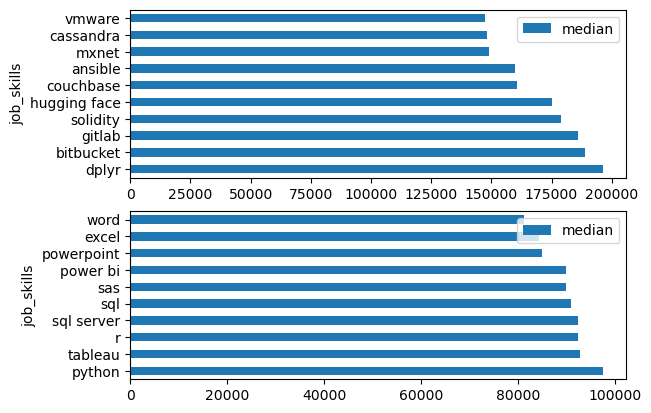

In [3]:
df_da = df_da.dropna(subset=['job_skills'])
df_da['job_skills'] = df_da['job_skills'].apply(ast.literal_eval)
df_da = df_da.explode('job_skills')


df_da[['salary_year_avg','job_skills',]]

df_us_da = df_da.groupby('job_skills')['salary_year_avg'].agg(['count','median'])


df_toppay = df_us_da.sort_values(ascending=False,by='median').head(10).sort_values(ascending=False,by='median')

df_top_count = df_us_da.sort_values(ascending=False,by='count').head(10).sort_values(ascending=False,by='count')
df_top_count =df_top_count.sort_values(ascending=False,by='median')






<Axes: xlabel='median', ylabel='job_skills'>

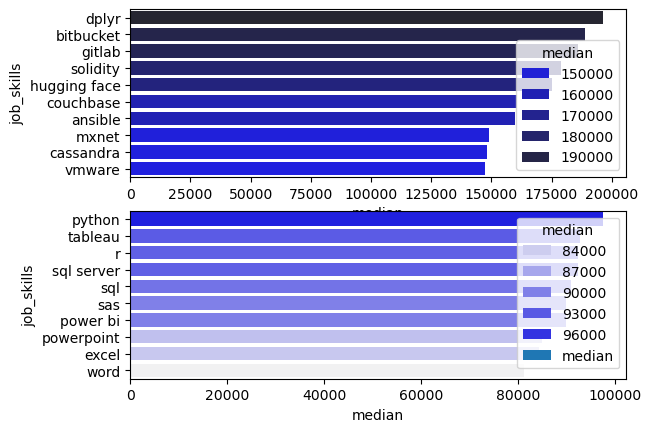

In [8]:
fig , ax =plt.subplots(2,1)

import seaborn as sns


sns.barplot(data=df_toppay, x='median', y=df_toppay.index, ax=ax[0],hue='median', palette='dark:b_r')


df_top_count.plot(kind='barh', y='median', ax=ax[1])
sns.barplot(data=df_top_count, x='median', y=df_top_count.index, ax=ax[1],hue='median', palette='light:b')

In [ ]:
df
df_da = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country']== 'India')] #& (df[df['job_location'] == 'India')].copy()
df_da

Text(9.444444444444445, 0.5, 'No of jobs')

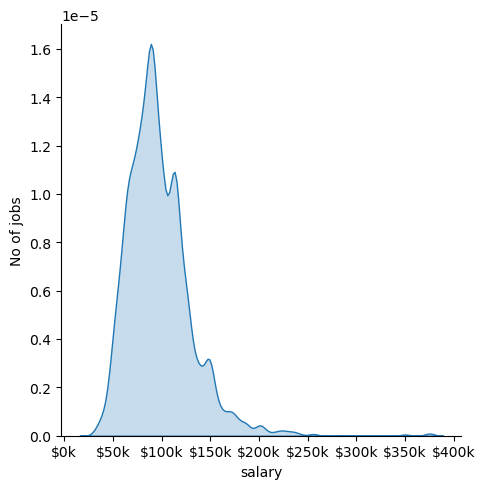

In [15]:
sns.displot(df_da['salary_year_avg'],kind='kde',fill='true')

ax =plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}k'))
plt.xlabel('salary')
plt.ylabel('No of jobs')

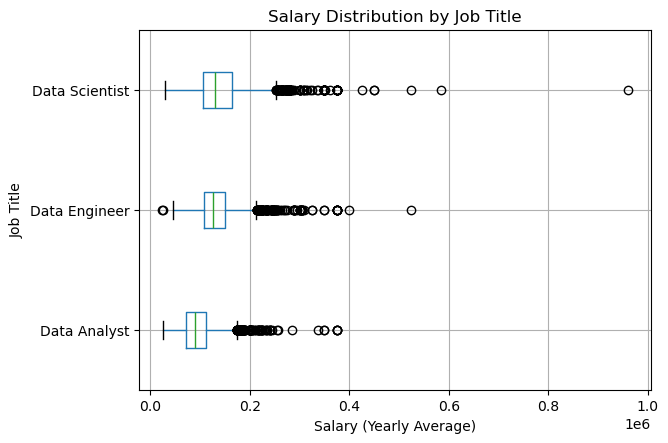

In [16]:
job_titles =['Data Analyst','Data Scientist','Data Engineer']


df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']== 'United States')].copy()

df_us = df_us.dropna(subset=['salary_year_avg'])

job_list =[df_us[df_us['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

df_us.boxplot(column='salary_year_avg', by='job_title_short', vert=False)
plt.title('Salary Distribution by Job Title')
plt.xlabel('Salary (Yearly Average)')
plt.ylabel('Job Title')
plt.suptitle('')  # Removes the automatic "Boxplot grouped by ..."
plt.show()

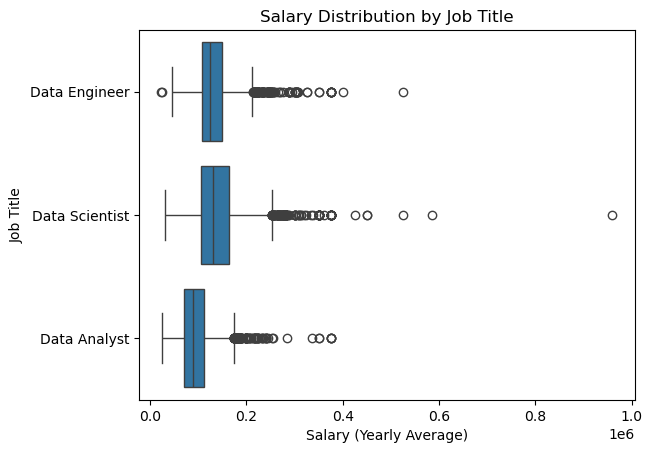

In [17]:
sns.boxplot(data=df_us,x='salary_year_avg', y='job_title_short')
plt.title('Salary Distribution by Job Title')
plt.xlabel('Salary (Yearly Average)')
plt.ylabel('Job Title')
plt.suptitle('')  # Removes the automatic "Boxplot grouped by ..."
plt.show()